In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
train_dir = os.path.join(PATH, "train")
test_dir = os.path.join(PATH, "validation")



In [5]:
train_cats = os.path.join(train_dir, "cats")
train_dogs = os.path.join(train_dir, "dogs")

test_cats = os.path.join(test_dir, "cats")
test_dogs = os.path.join(test_dir, "dogs")

In [6]:
print("cat images train:", len(os.listdir(train_cats)))
print("dog images train:", len(os.listdir(train_dogs)))

print("cat images validation:", len(os.listdir(test_cats)))
print("dog images validation:", len(os.listdir(test_dogs)))



cat images train: 1000
dog images train: 1000
cat images validation: 500
dog images validation: 500


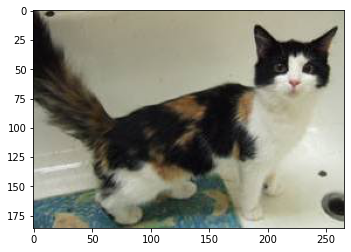

In [19]:
plt.imshow(keras.preprocessing.image.load_img( train_cats+ '/' + os.listdir(train_cats)[0]))
plt.show()

In [124]:
import random

def visualize_images(path_to_img_directory=None, label=None):
    fig, ax = plt.subplots(2, 4, figsize=(12, 6))
    ax = ax.flatten()

    for ax in ax:
        ax.imshow(keras.preprocessing.image.load_img( path_to_img_directory+ '/' + random.choice(os.listdir(path_to_img_directory))))
        ax.axis('off')
        if label:
            ax.set_title(label, fontsize = 12)
    plt.show()
    
def plot_Images(images_arr):
    fig, axes = plt.subplots(3, 4, figsize=(12,6))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

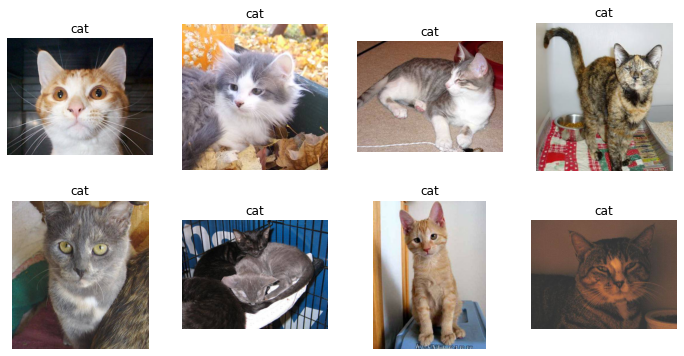

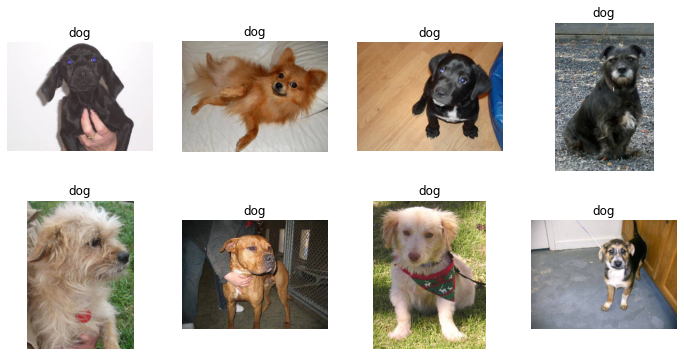

In [123]:
visualize_images(train_cats, 'cat')
visualize_images(train_dogs, 'dog')


In [8]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                        width_shift_range=.15,
                                                        height_shift_range=.15,
                                                        rotation_range=45,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        zoom_range=0.5,
                                                        shear_range=0.5
                                                        )
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)



In [10]:
ml_train = train_gen.flow_from_directory(directory=train_dir, 
                                         class_mode='binary', 
                                         target_size=(150, 150)
                                        )
ml_validation = valid_gen.flow_from_directory(directory=test_dir,
                                          class_mode='binary',
                                          target_size=(150,150),
                                         )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [117]:
x, y = next(ml_train)
x.shape
y.shape
# plot_Images(next(ml_train)[0])

(32,)

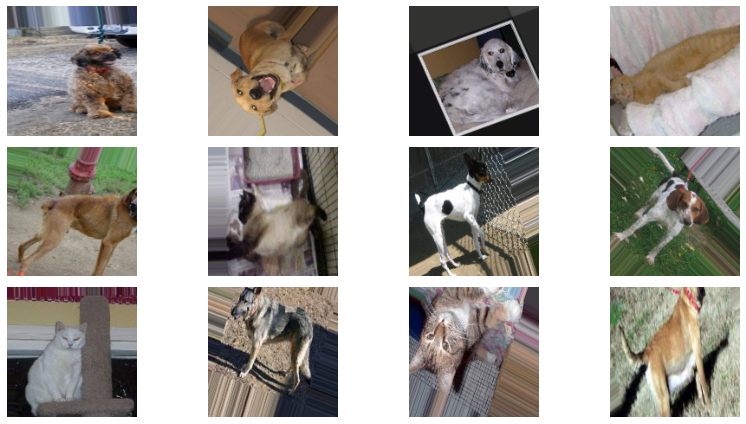

In [119]:
plot_Images(x)

In [31]:
os.path.dirname(path_to_zip)

'/home/harrsis/.keras/datasets'

In [32]:
path_to_zip

'/home/harrsis/.keras/datasets/cats_and_dogs.zip'

In [33]:
PATH

'/home/harrsis/.keras/datasets/cats_and_dogs_filtered'